In [260]:
#This is the start of our new project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble
import sklearn.metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [261]:
df1 = pd.read_csv('data/Training_Set_Labels_Y_variable.csv')
df2 = pd.read_csv('data/Training_Set_Values_X_variables.csv')

In [262]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [263]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [264]:
df1["status_group"].value_counts(normalize = True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [265]:
df1["status_group"] = df1["status_group"].replace({"non functional": "needs repair", "functional needs repair": "needs repair"})
df1["status_group"].value_counts()

functional      32259
needs repair    27141
Name: status_group, dtype: int64

In [266]:
merged_df = pd.merge(df2[['id','source', 'region', 'management', 'construction_year']], df1, on='id')

merged_df

,id,source,region,management,construction_year,status_group
0,69572,spring,Iringa,vwc,1999,functional
1,8776,rainwater harvesting,Mara,wug,2010,functional
2,34310,dam,Manyara,vwc,2009,functional
3,67743,machine dbh,Mtwara,vwc,1986,needs repair
4,19728,rainwater harvesting,Kagera,other,0,functional
...,...,...,...,...,...,...
59395,60739,spring,Kilimanjaro,water board,1999,functional
59396,27263,river,Iringa,vwc,1996,functional
59397,37057,machine dbh,Mbeya,vwc,0,functional
59398,31282,shallow well,Dodoma,vwc,0,functional


In [267]:
merged_df.to_csv('merged_df.csv', index=False)

In [268]:
merged_df.groupby(by=['source', 'status_group']).agg('count')['id']

source                status_group
dam                   functional        253
                      needs repair      403
hand dtw              functional        497
                      needs repair      377
lake                  functional        162
                      needs repair      603
machine dbh           functional       5422
                      needs repair     5653
other                 functional        126
                      needs repair       86
rainwater harvesting  functional       1386
                      needs repair      909
river                 functional       5465
                      needs repair     4147
shallow well          functional       8324
                      needs repair     8500
spring                functional      10592
                      needs repair     6429
unknown               functional         32
                      needs repair       34
Name: id, dtype: int64

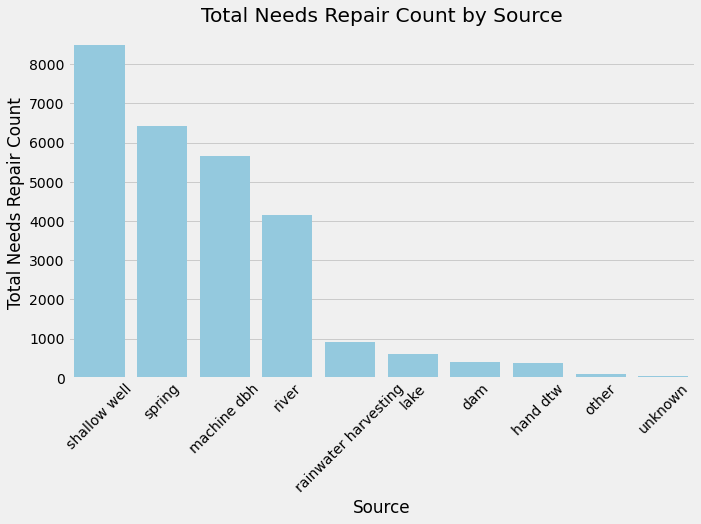

In [269]:
merged_df_needs_repair = merged_df[merged_df['status_group'] == 'needs repair']


source_counts = merged_df_needs_repair['source'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, color='skyblue')
plt.xlabel('Source')
plt.ylabel('Total Needs Repair Count')
plt.title('Total Needs Repair Count by Source')
plt.xticks(rotation=45)
plt.show()

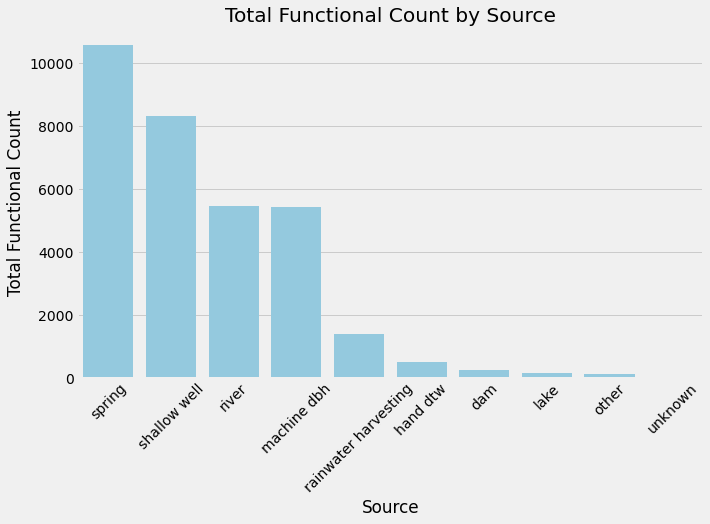

In [270]:
merged_df_functional = merged_df[merged_df['status_group'] == 'functional']


source_counts = merged_df_functional['source'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, color='skyblue')
plt.xlabel('Source')
plt.ylabel('Total Functional Count')
plt.title('Total Functional Count by Source')
plt.xticks(rotation=45)
plt.show()

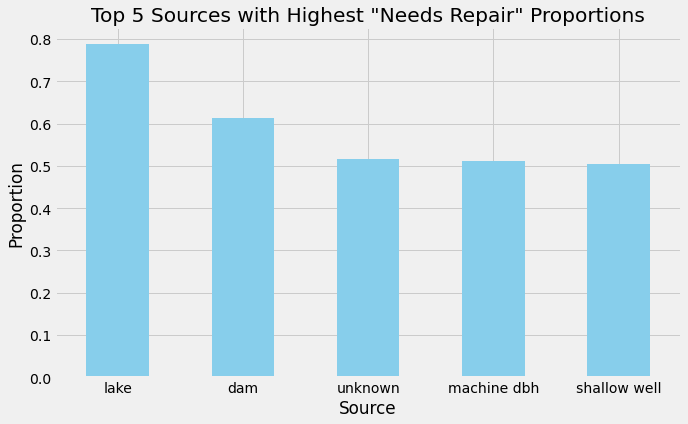

source
lake            0.788235
dam             0.614329
unknown         0.515152
machine dbh     0.510429
shallow well    0.505231
Name: status_group, dtype: float64


In [271]:
# Group by "source" and count the occurrences of each status group
grouped_counts = merged_df.groupby("source")["status_group"].value_counts()

# Calculate proportions
total_counts = grouped_counts.groupby(level=0).sum()
proportions = grouped_counts / total_counts

# Filter proportions for "needs repair"
needs_repair_proportions = proportions.loc[:, 'needs repair']

# Sort and display the top ratios
top_ratios = needs_repair_proportions.sort_values(ascending=False).head()

plt.figure(figsize=(10, 6))
top_ratios.plot(kind='bar', color='skyblue')
plt.title('Top 5 Sources with Highest "Needs Repair" Proportions')
plt.ylabel('Proportion')
plt.xlabel('Source')
plt.xticks(rotation=0)
plt.show()
print(top_ratios)

In [272]:
merged_df.groupby(by=['region', 'status_group']).agg('count')['id']

region         status_group
Arusha         functional      2294
               needs repair    1056
Dar es Salaam  functional       461
               needs repair     344
Dodoma         functional      1009
               needs repair    1192
Iringa         functional      4141
               needs repair    1153
Kagera         functional      1727
               needs repair    1589
Kigoma         functional      1363
               needs repair    1453
Kilimanjaro    functional      2640
               needs repair    1739
Lindi          functional       460
               needs repair    1086
Manyara        functional       987
               needs repair     596
Mara           functional       886
               needs repair    1083
Mbeya          functional      2319
               needs repair    2320
Morogoro       functional      2119
               needs repair    1887
Mtwara         functional       524
               needs repair    1206
Mwanza         functional      1502


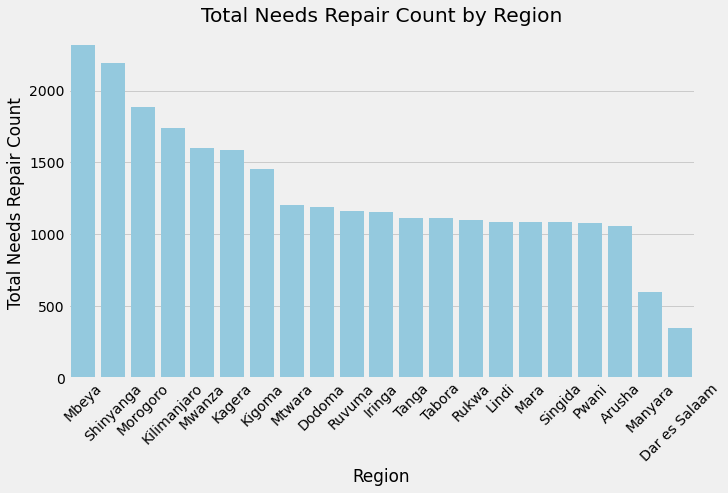

In [273]:
source_counts = merged_df_needs_repair['region'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Needs Repair Count')
plt.title('Total Needs Repair Count by Region')
plt.xticks(rotation=45)
plt.show()

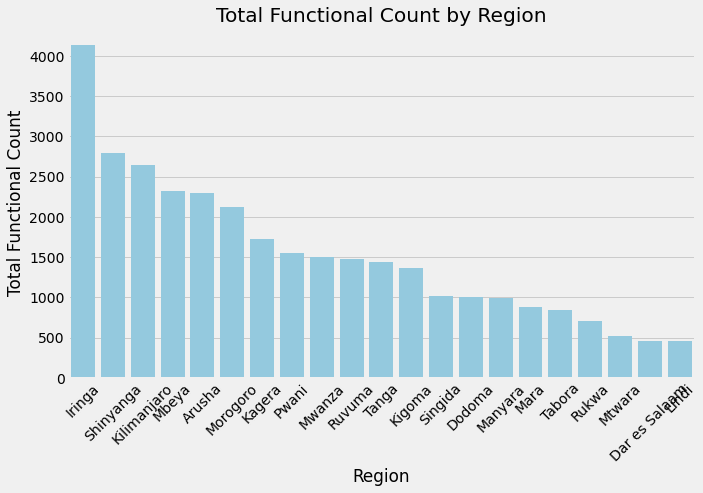

In [274]:
source_counts = merged_df_functional['region'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Functional Count')
plt.title('Total Functional Count by Region')
plt.xticks(rotation=45)
plt.show()

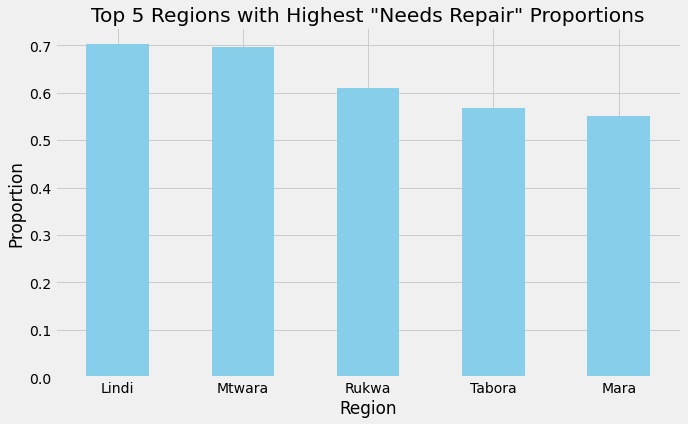

region
Lindi     0.702458
Mtwara    0.697110
Rukwa     0.608960
Tabora    0.567126
Mara      0.550025
Name: status_group, dtype: float64


In [275]:
# Group by "source" and count the occurrences of each status group
grouped_counts = merged_df.groupby("region")["status_group"].value_counts()

# Calculate proportions
total_counts = grouped_counts.groupby(level=0).sum()
proportions = grouped_counts / total_counts

# Filter proportions for "needs repair"
needs_repair_proportions = proportions.loc[:, 'needs repair']

# Sort and display the top ratios
top_ratios = needs_repair_proportions.sort_values(ascending=False).head()

plt.figure(figsize=(10, 6))
top_ratios.plot(kind='bar', color='skyblue')
plt.title('Top 5 Regions with Highest "Needs Repair" Proportions')
plt.ylabel('Proportion')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show()
print(top_ratios)

In [276]:
merged_df.groupby(by=['management', 'status_group']).agg('count')['id']

management        status_group
company           functional        267
                  needs repair      418
other             functional        505
                  needs repair      339
other - school    functional         23
                  needs repair       76
parastatal        functional       1020
                  needs repair      748
private operator  functional       1476
                  needs repair      495
trust             functional         46
                  needs repair       32
unknown           functional        224
                  needs repair      337
vwc               functional      20425
                  needs repair    20082
water authority   functional        446
                  needs repair      458
water board       functional       2170
                  needs repair      763
wua               functional       1751
                  needs repair      784
wug               functional       3906
                  needs repair     2609
Name: id,

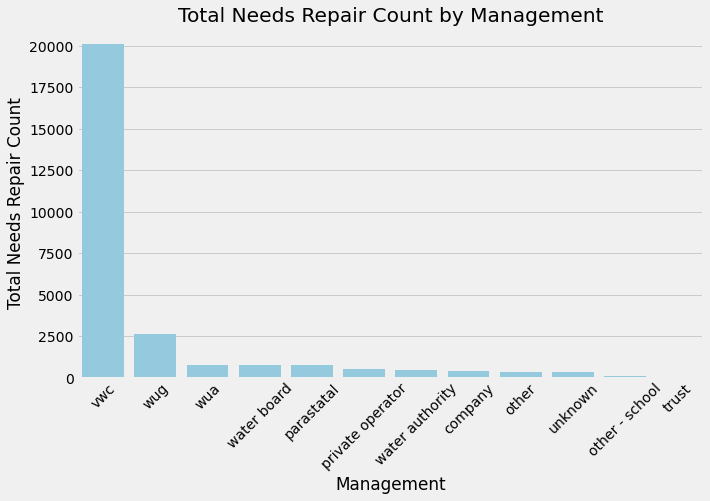

In [277]:
source_counts = merged_df_needs_repair['management'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, color='skyblue')
plt.xlabel('Management')
plt.ylabel('Total Needs Repair Count')
plt.title('Total Needs Repair Count by Management')
plt.xticks(rotation=45)
plt.show()

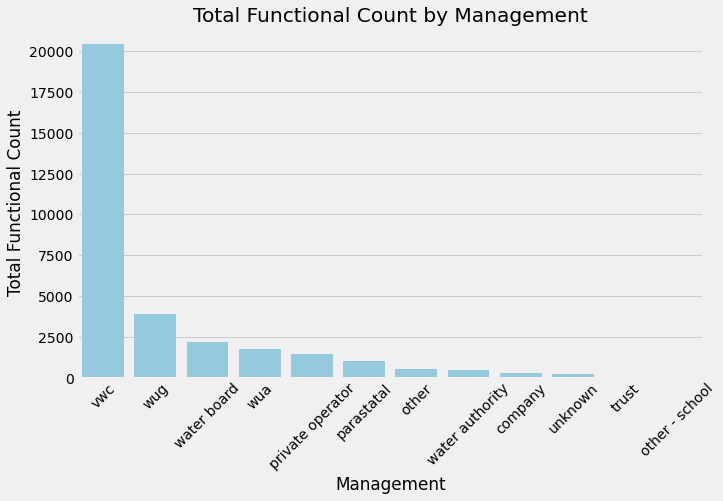

In [278]:
source_counts = merged_df_functional['management'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, color='skyblue')
plt.xlabel('Management')
plt.ylabel('Total Functional Count')
plt.title('Total Functional Count by Management')
plt.xticks(rotation=45)
plt.show()

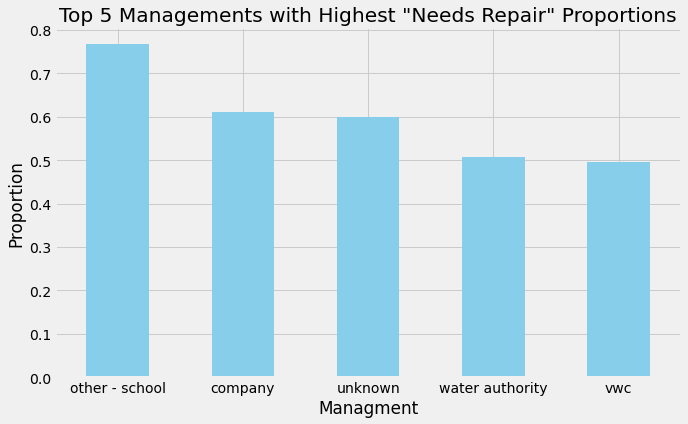

management
other - school     0.767677
company            0.610219
unknown            0.600713
water authority    0.506637
vwc                0.495766
Name: status_group, dtype: float64


In [279]:
# Group by "source" and count the occurrences of each status group
grouped_counts = merged_df.groupby("management")["status_group"].value_counts()

# Calculate proportions
total_counts = grouped_counts.groupby(level=0).sum()
proportions = grouped_counts / total_counts

# Filter proportions for "needs repair"
needs_repair_proportions = proportions.loc[:, 'needs repair']

# Sort and display the top ratios
top_ratios = needs_repair_proportions.sort_values(ascending=False).head()

plt.figure(figsize=(10, 6))
top_ratios.plot(kind='bar', color='skyblue')
plt.title('Top 5 Managements with Highest "Needs Repair" Proportions')
plt.ylabel('Proportion')
plt.xlabel('Managment')
plt.xticks(rotation=0)
plt.show()
print(top_ratios)

In [280]:
merged_df["source"].value_counts()
#possible feature

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [281]:
merged_df["region"].value_counts()
#possible feature

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [282]:
merged_df["management"].value_counts()
#Possible feature

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [283]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 59400 non-null  int64 
 1   source             59400 non-null  object
 2   region             59400 non-null  object
 3   management         59400 non-null  object
 4   construction_year  59400 non-null  int64 
 5   status_group       59400 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [284]:
data_df_func = merged_df.loc[(merged_df['status_group'] == 'functional'), 'construction_year']
data_df_repair = merged_df.loc[(merged_df['status_group'] == 'needs repair'), 'construction_year']

data_df_func

0        1999
1        2010
2        2009
4           0
5        2009
         ... 
59395    1999
59396    1996
59397       0
59398       0
59399    2002
Name: construction_year, Length: 32259, dtype: int64

In [285]:
data_df_repair

3        1986
6           0
7           0
8           0
16       1978
         ... 
59382    2008
59384       0
59391    1967
59392       0
59394    2007
Name: construction_year, Length: 27141, dtype: int64

count    21704.000000
mean      1999.938675
std         10.931700
min       1960.000000
25%       1995.000000
50%       2003.000000
75%       2009.000000
max       2013.000000
Name: construction_year, dtype: float64

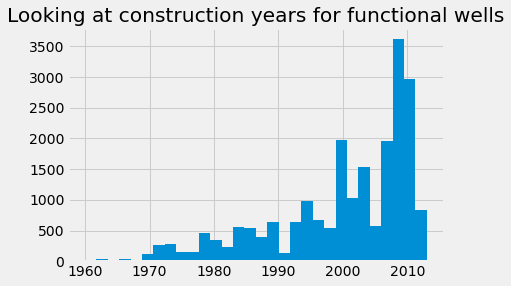

In [286]:
data_df_func_adj = data_df_func.loc[data_df_func != 0]
data_df_repair_adj = data_df_repair.loc[data_df_repair != 0]

fig, ax = plt.subplots()
ax.hist(data_df_func_adj, bins=30)
plt.title('Looking at construction years for functional wells');

data_df_func_adj.describe()

count    16987.000000
mean      1992.823218
std         13.161274
min       1960.000000
25%       1982.000000
50%       1995.000000
75%       2005.000000
max       2013.000000
Name: construction_year, dtype: float64

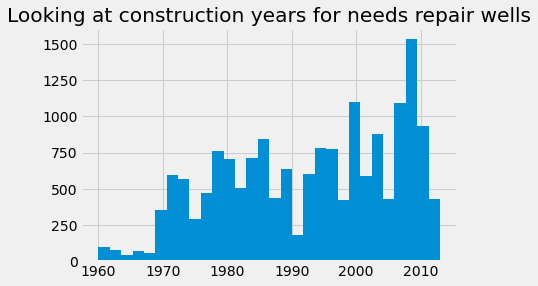

In [287]:
fig, ax = plt.subplots()
ax.hist(data_df_repair_adj, bins=30)
plt.title('Looking at construction years for needs repair wells');

data_df_repair_adj.describe()


In [339]:
le = LabelEncoder()
merged_df['target'] = le.fit_transform(merged_df['status_group'])

In [340]:
merged_df

,id,source,region,management,construction_year,status_group,target
0,69572,spring,Iringa,vwc,1999,functional,0
1,8776,rainwater harvesting,Mara,wug,2010,functional,0
2,34310,dam,Manyara,vwc,2009,functional,0
3,67743,machine dbh,Mtwara,vwc,1986,needs repair,1
4,19728,rainwater harvesting,Kagera,other,0,functional,0
...,...,...,...,...,...,...,...
59395,60739,spring,Kilimanjaro,water board,1999,functional,0
59396,27263,river,Iringa,vwc,1996,functional,0
59397,37057,machine dbh,Mbeya,vwc,0,functional,0
59398,31282,shallow well,Dodoma,vwc,0,functional,0


In [341]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 59400 non-null  int64 
 1   source             59400 non-null  object
 2   region             59400 non-null  object
 3   management         59400 non-null  object
 4   construction_year  59400 non-null  int64 
 5   status_group       59400 non-null  object
 6   target             59400 non-null  int32 
dtypes: int32(1), int64(2), object(4)
memory usage: 3.4+ MB


In [342]:
X = merged_df.drop(['id', 'status_group'], axis=1)
y = merged_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [343]:
# Create a dummy classifier using the most frequent strategy
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)

# Make predictions on the training set
predictions = dummy_model.predict(X_train)[:50]
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [344]:
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.54377104, 0.54377104, 0.54388328, 0.54388328, 0.54388328])

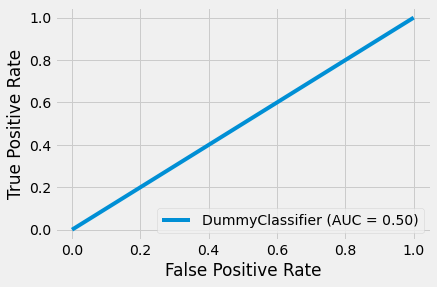

In [345]:
plot_roc_curve(dummy_model, X_train, y_train);

In [383]:
y_test_pred_dummy = dummy_model.predict(X_test)
recall_score(y_test, y_test_pred_dummy)

0.0

In [384]:
accuracy_score(y_test, y_test_pred_dummy)

0.5408080808080808

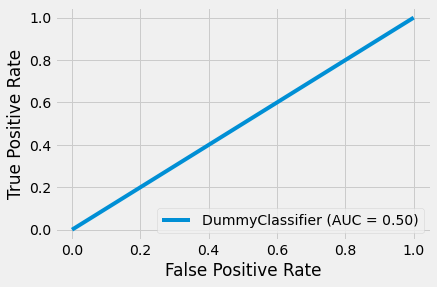

In [350]:
plot_roc_curve(dummy_model, X_test, y_test);

In [351]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 9191 to 38408
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   source             44550 non-null  object
 1   region             44550 non-null  object
 2   management         44550 non-null  object
 3   construction_year  44550 non-null  int64 
 4   target             44550 non-null  int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 1.9+ MB


In [352]:
X_train_cat = X_train[['source', 'region', 'management']]

encoder = OneHotEncoder(drop='first')
encoder.fit(X_train_cat)
                                           
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat).todense(), 
                                   columns=encoder.get_feature_names())

X_train_adj = pd.concat([X_train['construction_year'].reset_index(drop=True), X_train_cat_encoded], axis=1)

In [353]:
X_train_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   construction_year        44550 non-null  int64  
 1   x0_hand dtw              44550 non-null  float64
 2   x0_lake                  44550 non-null  float64
 3   x0_machine dbh           44550 non-null  float64
 4   x0_other                 44550 non-null  float64
 5   x0_rainwater harvesting  44550 non-null  float64
 6   x0_river                 44550 non-null  float64
 7   x0_shallow well          44550 non-null  float64
 8   x0_spring                44550 non-null  float64
 9   x0_unknown               44550 non-null  float64
 10  x1_Dar es Salaam         44550 non-null  float64
 11  x1_Dodoma                44550 non-null  float64
 12  x1_Iringa                44550 non-null  float64
 13  x1_Kagera                44550 non-null  float64
 14  x1_Kigoma             

In [354]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 58203 to 21108
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   source             14850 non-null  object
 1   region             14850 non-null  object
 2   management         14850 non-null  object
 3   construction_year  14850 non-null  int64 
 4   target             14850 non-null  int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 638.1+ KB


In [355]:
X_test_cat = X_test[['source', 'region', 'management']]
                                    
X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat).todense(), 
                                   columns=encoder.get_feature_names())

X_test_adj = pd.concat([X_test['construction_year'].reset_index(drop=True), X_test_cat_encoded], axis=1)

In [356]:
X_test_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   construction_year        14850 non-null  int64  
 1   x0_hand dtw              14850 non-null  float64
 2   x0_lake                  14850 non-null  float64
 3   x0_machine dbh           14850 non-null  float64
 4   x0_other                 14850 non-null  float64
 5   x0_rainwater harvesting  14850 non-null  float64
 6   x0_river                 14850 non-null  float64
 7   x0_shallow well          14850 non-null  float64
 8   x0_spring                14850 non-null  float64
 9   x0_unknown               14850 non-null  float64
 10  x1_Dar es Salaam         14850 non-null  float64
 11  x1_Dodoma                14850 non-null  float64
 12  x1_Iringa                14850 non-null  float64
 13  x1_Kagera                14850 non-null  float64
 14  x1_Kigoma             

In [357]:
scaler = StandardScaler()

X_train_adj_scaled = scaler.fit_transform(X_train_adj)
X_test_adj_scaled = scaler.transform(X_test_adj)

In [387]:
log_model = LogisticRegression(random_state=100)
log_model.fit(X_train_adj, y_train)

LogisticRegression(random_state=100)

In [388]:
coefficients = log_model.coef_.flatten().tolist()

In [389]:
feature_names = list(X_train_adj.columns)

In [390]:
features_and_coeffs = list(zip(feature_names, coefficients))

In [391]:
sort_list = sorted(features_and_coeffs, key=lambda x: x[1], reverse = True)

In [393]:
sort_list

[('x1_Mtwara', 0.6498257144637688),
 ('x1_Lindi', 0.5860506550231809),
 ('x0_lake', 0.4515832421900472),
 ('x1_Rukwa', 0.4017982497052705),
 ('x2_vwc', 0.40024371812071924),
 ('x1_Kigoma', 0.38597326659510783),
 ('x1_Mara', 0.3553289343997669),
 ('x1_Kilimanjaro', 0.2941980908056126),
 ('x2_unknown', 0.21801914886268944),
 ('x2_water authority', 0.16202500386312724),
 ('x1_Mbeya', 0.14672335797865158),
 ('x1_Singida', 0.08919109962602688),
 ('x0_shallow well', 0.08117391803865526),
 ('x2_other - school', 0.07842910888682339),
 ('x1_Dodoma', 0.06740876715557605),
 ('x1_Tabora', 0.063394580960736),
 ('x2_parastatal', 0.04056751820255843),
 ('x1_Shinyanga', 0.030949260446753345),
 ('x0_hand dtw', 0.0036742908658151828),
 ('x2_trust', 0.002754372979952146),
 ('x0_unknown', 0.0005898884971014079),
 ('construction_year', -4.0680523701444336e-05),
 ('x1_Dar es Salaam', -0.012074116926150222),
 ('x1_Kagera', -0.04508349473166083),
 ('x0_other', -0.04773817967786186),
 ('x1_Ruvuma', -0.05684207

[0.60953984 0.61560045 0.61245791 0.61705948 0.60953984]


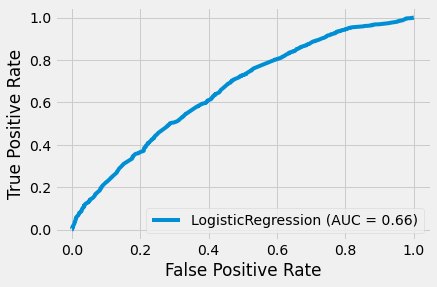

In [358]:
# Create and fit the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_adj_scaled, y_train)

cv_results_log = cross_val_score(log_model, X_train_adj_scaled, y_train, cv=5)
print(cv_results_log)

plot_roc_curve(log_model, X_train_adj_scaled, y_train);


In [359]:
y_test_pred_logreg = log_model.predict(X_test_adj_scaled)

In [360]:
y_test_pred_logreg

array([0, 0, 1, ..., 0, 1, 0])

In [382]:
recall_score(y_test, y_test_pred_logreg)

0.48746150461944565

In [363]:
accuracy_score(y_test, y_test_pred_logreg)

0.6103703703703703

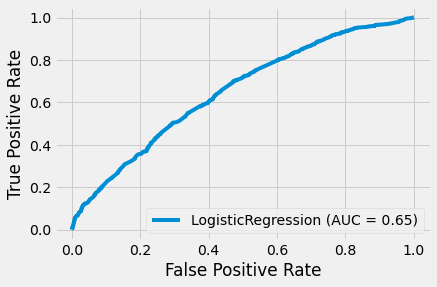

In [365]:
plot_roc_curve(log_model, X_test_adj_scaled, y_test);

In [366]:
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
train_scores = []
test_scores = []

for c in C_values:
    lr = LogisticRegression(C=c, random_state=100)
    lr.fit(X_train_adj_scaled, y_train)
    train_score = lr.score(X_train_adj_scaled, y_train)
    test_score = lr.score(X_test_adj_scaled, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

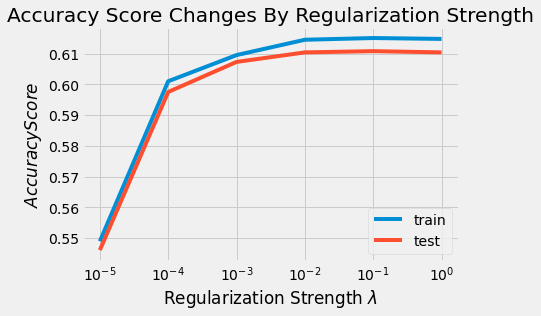

In [367]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
plt.xscale('log')
plt.title('Accuracy Score Changes By Regularization Strength')
ax.set_xlabel('Regularization Strength $\lambda$')
ax.set_ylabel('$Accuracy Score$')
ax.plot(C_values, train_scores, label='train')
ax.plot(C_values, test_scores, label='test')
plt.legend();

In [368]:
train_scores

[0.5490011223344556,
 0.6009876543209877,
 0.6094949494949495,
 0.6144781144781145,
 0.6150392817059483,
 0.6147474747474747]

In [369]:
test_scores

[0.5461279461279461,
 0.5975084175084175,
 0.6072727272727273,
 0.6103703703703703,
 0.6107744107744107,
 0.6103703703703703]

In [370]:
# Create and fit the logistic regression model with best regularization (c = 0.1)

log_model_bestreg = LogisticRegression(C=0.1, random_state=100)
log_model_bestreg.fit(X_train_adj_scaled, y_train)

LogisticRegression(C=0.1, random_state=100)

In [371]:
cv_results_log_bestreg = cross_val_score(log_model_bestreg, X_train_adj_scaled, y_train, cv=5)
cv_results_log_bestreg

array([0.60953984, 0.61459035, 0.61099888, 0.61694725, 0.60953984])

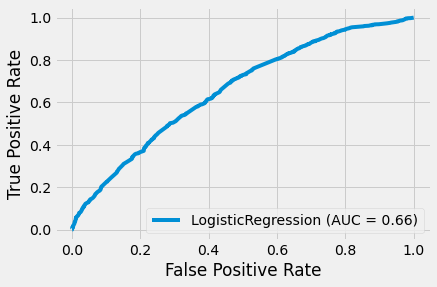

In [372]:
plot_roc_curve(log_model_bestreg, X_train_adj_scaled, y_train);

In [373]:
y_test_pred_logreg_best = log_model_bestreg.predict(X_test_adj_scaled)

In [374]:
y_test_pred_logreg_best

array([0, 0, 1, ..., 0, 1, 0])

In [385]:
recall_score(y_test, y_test_pred_logreg_best)

0.4884880481008946

In [376]:
accuracy_score(y_test, y_test_pred_logreg_best)

0.6107744107744107

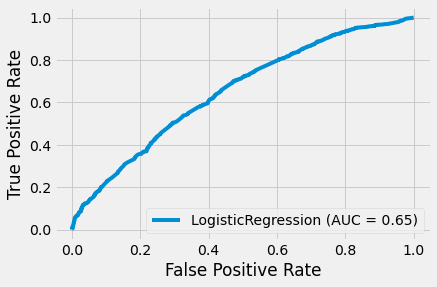

In [377]:
plot_roc_curve(log_model_bestreg, X_test_adj_scaled, y_test);

In [386]:
random_forest_model = RandomForestClassifier(n_estimators=200, random_state=100)
random_forest_model.fit(X_train_adj, y_train)

y_pred = random_forest_model.predict(X_test_adj)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1score:.2f}")

Accuracy: 0.66
Precision: 0.65
Recall: 0.59
F1 Score: 0.62


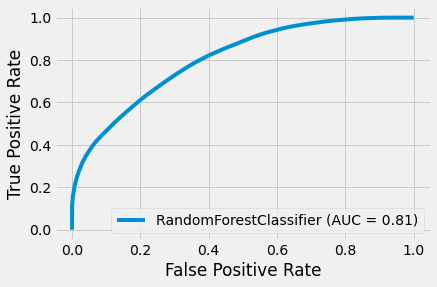

In [380]:
plot_roc_curve(random_forest_model, X_train_adj, y_train);

Confusion Matrix:
[[5846 2185]
 [2808 4011]]


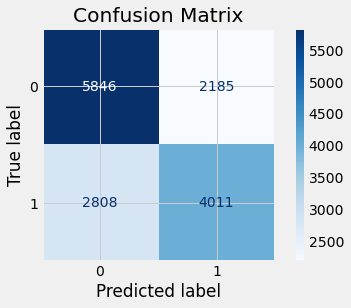

In [381]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

# Plot the confusion matrix
plot_confusion_matrix(random_forest_model, X_test_adj, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [324]:
# Create a binary target variable (0 for 'functional', 1 for 'needs repair')
#le = LabelEncoder()
#df1['target'] = le.fit_transform(df1['status_group'])

# Select relevant features (X) and target variable (y)X_cat = encoder.fit_transform(df2[['source', 'region', 'management']])
#X_cat = encoder.fit_transform(df2[['source', 'region', 'management']])
#X = X_cat
#y = df1['target']

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model
#model = LinearRegression()
#model.fit(X_train, y_train)

# Evaluate the model (you can use R-squared or other metrics)
#r_squared = model.score(X_test, y_test)
#print(f"R-squared: {r_squared:.2f}")

In [325]:
# Create a binary target variable (0 for 'functional', 1 for 'needs repair')
#le = LabelEncoder()
#df1['target'] = le.fit_transform(df1['status_group'])

# Select relevant features (X) and target variable (y)
#X_cat = encoder.fit_transform(df2[['source', 'region', 'management']])
#X = X_cat
##y = df1['target']

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree classifier
#model = DecisionTreeClassifier()
#model.fit(X_train, y_train)

# Make predictions on the test set
#y_test_predictions = model.predict(X_test)

# Compute precision, recall, and F1-score
#precision1 = precision_score(y_test, y_test_predictions, average='weighted')
#recall1 = recall_score(y_test, y_test_predictions, average='weighted')
#f1score1 = f1_score(y_test, y_test_predictions, average='weighted')

#print(f"Precision: {precision1:.2f}")
#print(f"Recall: {recall1:.2f}")
#print(f"F1 Score: {f1score1:.2f}")

In [326]:
#precision2 = precision_score(y_test, y_test_predictions, average='micro')
#recall2 = recall_score(y_test, y_test_predictions, average='micro')
#f1score2 = f1_score(y_test, y_test_predictions, average='micro')

#print(f"Precision: {precision2:.2f}")
#print(f"Recall: {recall2:.2f}")
#print(f"F1 Score: {f1score2:.2f}")

In [327]:
#precision3 = precision_score(y_test, y_test_predictions, average='macro')
#recall3 = recall_score(y_test, y_test_predictions, average='macro')
##f1score3 = f1_score(y_test, y_test_predictions, average='macro')

#print(f"Precision: {precision3:.2f}")
#print(f"Recall: {recall3:.2f}")
#print(f"F1 Score: {f1score3:.2f}")

In [328]:
# Create a binary target variable (0 for 'functional', 1 for 'needs repair')
#le = LabelEncoder()
#df1['target'] = le.fit_transform(df1['status_group'])

# Split data into features (X) and target (y)
#X_cat = encoder.fit_transform(df2[['source', 'region', 'management']])
#X = X_cat
#y = df1['target']

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
#rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
#rf_model.fit(X_train, y_train)

# Make predictions on the test set
#y_pred = rf_model.predict(X_test)


#accuracy = accuracy_score(y_test, y_pred)
#precision4 = precision_score(y_test, y_pred, average='weighted')
#recall4 = recall_score(y_test, y_pred, average='weighted')
#f1score4 = f1_score(y_test, y_pred, average='weighted')

#print(f"Random Forest Model Accuracy: {accuracy:.2f}")
#print(f"Random Forest Model Precision: {precision4:.2f}")
#print(f"Random Forest Model Recall: {recall4:.2f}")
#print(f"Random Forest Model f1 Score: {f1score4:.2f}")

In [329]:
#precision5 = precision_score(y_test, y_pred, average='micro')
#recall5 = recall_score(y_test, y_pred, average='micro')
#f1score5 = f1_score(y_test, y_pred, average= 'micro')

#print(f"Random Forest Model Precision: {precision5:.2f}")
#print(f"Random Forest Model Recall: {recall5:.2f}")
#print(f"Random Forest Model f1 Score: {f1score5:.2f}")